# Email : diptadhor2002@gmail.com

# Load dataset

In [ ]:
import pandas as pd
import numpy as np
url = "https://github.com/phitronio/Python-for-ML/raw/main/final-employee-ds.csv"
df = pd.read_csv(url)
df.head()

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


# Ans to the Q1

In [ ]:
train=df['TrainingHours'].to_numpy()
train=train.astype(np.float64)

mean=train.mean()
std=train.std()
print("\nMean: ",mean)
print("Standard Deviation: ",std)


Mean:  24.19
Standard Deviation:  13.842467265628624


# Ans to the Q2

In [ ]:
df["Salary"] = df.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.median()))

emply=df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]

sal= emply['Salary'].sum()
print("Total Salary sum: ",sal)


Total Salary sum:  1985775.5


# Ans to the Q3

In [ ]:
emp = df[
    ( (df['Department'] == 'IT') | (df['Department'] == 'Finance') ) &
    (df['Age'].between(30,45)) &
    (df['PerformanceScore']> 88)
    ]

emp =emp.sort_values(by='Salary', ascending=False)

ans = emp[['Name', 'Department', 'Salary', 'PerformanceScore']]
ans

,Name,Department,Salary,PerformanceScore
94,Employee_95,IT,140386.0,94
88,Employee_89,Finance,126027.0,92
4,Employee_5,Finance,85543.0,97
32,Employee_33,IT,83919.0,98
55,Employee_56,Finance,49540.0,94


# Ans to the Q4

In [ ]:
df['SalaryPerHour']= df['Salary'] / (df['WorkHoursPerWeek']*4)

top5= df.sort_values(by='SalaryPerHour', ascending=False).head(5)

ans=top5[['Name', 'SalaryPerHour']]
ans

,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


# Ans to the Q5

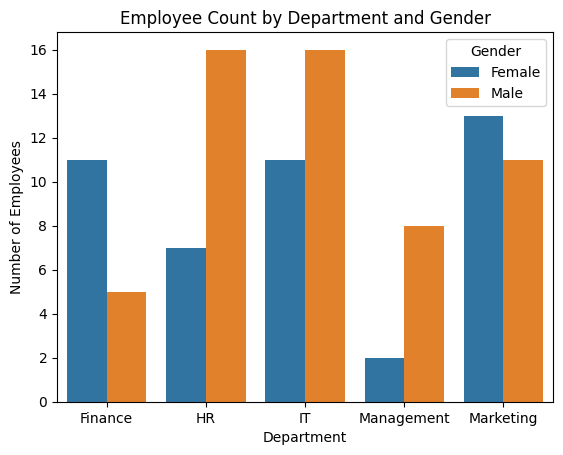

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cnt = df.groupby(['Department', 'Gender']).size().reset_index(name='Count')

sns.barplot(data=cnt, x='Department', y='Count', hue='Gender')
plt.title('Employee Count by Department and Gender')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()